# Analysis of Ki67 during reprogramming for NIL v. 6F

## Load data
Notes:

1. 2022.03.07_Hb9_Ki67_singlets.csv gated on singlets

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import re
import seaborn as sns
import matplotlib
import rushd as rd
no_yellow_viridis = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap('viridis', 256)(np.linspace(0,0.85,256)))


In [2]:
figpath = '../figures/fig3/'
file = rd.datadir / '2022.03.07_HG_Ki67_1-3' / '2022.03.07_Hb9_Ki67_singlets.csv'
df = pd.read_csv(file, header=0)

df.rename(columns={'Sample:': 'Sample',
                   'Cells/Singlets | Count': 'Count',
                   'Cells/Singlets/FSC-A, AF 594-H+ | Count': 'Ki67+ Count',
                   'Cells/Singlets/FSC-A, GFP-H+ | Count': 'GFP+ Count',
                   'Cells/Singlets/FSC-A, GFP-H+/FSC-A, AF 594-H+ | Count': 'GFP+ AND Ki67+ Count'}, inplace=True)

# Rename conditions (e.g. NIL + HIP = NILDDRR)
cond_cat = list()
for index, row in df.iterrows():
    if row['HIP']:
        if row['Cond'] == 'HIP':
            cond_cat.append('DDRR')
        else:
            cond_cat.append(row['Cond'] + 'DDRR')
    else:
        cond_cat.append(row['Cond'])
df['Cond'] = cond_cat

df = df.astype({'HIP': 'category',
                'Cond': 'category',
                'dpi': 'int64',
                'Rep': 'int64',
                'Count': 'float64',
                'Ki67+ Count': 'float64',
                'GFP+ Count': 'float64',
                'GFP+ AND Ki67+ Count': 'float64'})

# Convert counts into percentages
df['Ki67+ percent'] = df['Ki67+ Count'] / df['Count']*100
df['GFP+ percent'] = df['GFP+ Count'] / df['Count']*100
df['Ki67+ of GFP+ percent'] = df['GFP+ AND Ki67+ Count'] / df['GFP+ Count']*100
df['Ki67+ of GFP+ percent'] = df['Ki67+ of GFP+ percent'].fillna(0) # For cond with no GFP+, replaces Nan with 0

# Turn percentage Ki67 into relative percentage to 6F, 3dpi
Ki67_rel_percent = list()
for index, row in df.iterrows():
    # Make percentage relative to 6F, 3 dpi for that condition
    base = df.loc[(df['Cond'] == '6F') & (
        df['Rep'] == row['Rep']) & (df['dpi'] == 3)]

    Ki67_rel_percent.append(row['Ki67+ percent'] /
                            float(base['Ki67+ percent'])*100)

df['Ki67+ relative percent'] = Ki67_rel_percent


# Look at Ki67 and GFP over time

In [3]:
# Color mapping
cond_list = ['NIL', 'NILDDRR','6F', '6FDDRR', 'DDRR']
colormap = {'NIL': 'crimson', 'NILDDRR': 'dodgerblue',
            '6F': 'coral', '6FDDRR': 'teal',
            'DDRR': 'black'}

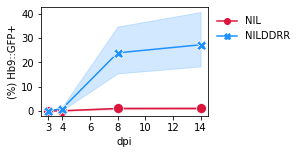

In [ ]:
x = 'dpi'
y = 'GFP+ percent'
hue = 'Cond'
hue_order = ['NIL', 'NILDDRR']


# Make plot
fig, ax = plt.subplots(1, 1, figsize=(3, 2))

# Plot
sns.lineplot(
    ax=ax,
    data=df,
    x=x, y=y, hue=hue, style=hue,
    hue_order=hue_order, style_order=hue_order, palette=colormap,
    markersize=10, markers=True, dashes=False
)

# Adjust axes
for sub_ax in plt.gcf().get_axes():
    sub_ax.yaxis.set_label_text(r'(%) Hb9::GFP+')
    sub_ax.set_xticks([3, 4, 6, 8, 10, 12, 14])
ax.set_yticks(np.arange(0, 50, 10))

# Misc plotting stuff
sns.move_legend(sub_ax, title='', loc='upper left', bbox_to_anchor=(1,1), frameon=False)
# plt.rcParams['font.size'] = '12'
plt.savefig(figpath + 'SI/GFP_3-14dpi-small.svg', bbox_inches='tight')

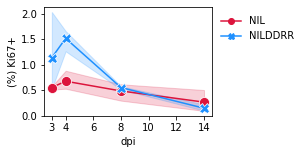

In [ ]:
x = 'dpi'
y = 'Ki67+ percent'
hue = 'Cond'
hue_order = ['NIL', 'NILDDRR']

# Make plot
fig, ax = plt.subplots(1, 1, figsize=(3, 2))

sns.lineplot(
    ax=ax,
    data=df,
    x=x, y=y, hue=hue, style=hue,
    hue_order=hue_order, style_order=hue_order, palette=colormap,
    markersize=10, markers=True, dashes=False
)

# Adjust axes
# y_lim = (0, 10)
for sub_ax in plt.gcf().get_axes():
    # sub_ax.set_ylim(y_lim)
    sub_ax.yaxis.set_label_text('(%) Ki67+')
    sub_ax.set_xticks([3, 4, 6, 8, 10, 12, 14])
    # sub_ax.set_yticks(np.arange(0, 2, 11))

# Misc plotting stuff
sns.move_legend(sub_ax, title='', loc='upper left', bbox_to_anchor=(1,1), frameon=False)
plt.savefig(figpath + 'SI/Ki67_3-14dpi-small.svg', bbox_inches='tight')

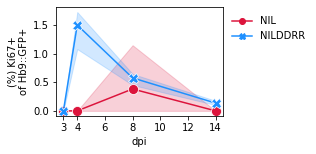

In [ ]:
x = 'dpi'
y = 'Ki67+ of GFP+ percent'
hue = 'Cond'
hue_order = ['NIL', 'NILDDRR']

# Make plot
fig, ax = plt.subplots(1, 1, figsize=(3, 2))

sns.lineplot(
    ax=ax,
    data=df,
    x=x, y=y, hue=hue, style=hue,
    hue_order=hue_order, style_order=hue_order, palette=colormap,
    markersize=10, markers=True, dashes=False
)

# Adjust axes
# y_lim = (0, 10)
for sub_ax in plt.gcf().get_axes():
    # sub_ax.set_ylim(y_lim)
    sub_ax.yaxis.set_label_text('(%) Ki67+\nof Hb9::GFP+')
    sub_ax.set_xticks([3, 4, 6, 8, 10, 12, 14])
    # sub_ax.set_yticks(np.arange(0, 2, 11))

# Misc plotting stuff
sns.move_legend(sub_ax, title='', loc='upper left', bbox_to_anchor=(1,1), frameon=False)
plt.savefig(figpath + 'SI/Ki67_of_GFP_3-14dpi-small.svg', bbox_inches='tight')

As expected, NILDDRR has massive GFP+ cells but minimal Ki67 of the GFP+ after 8 dpi

# What does NILDDRR look like on flow plot?

In [7]:
path = rd.datadir / '2022.03.07_HG_Ki67_1-3' / 'export FSC-A, DAPI-H+'
files = Path(path).glob('*.csv')

# Store all data in list of dfs which will be converted to df at end
data = list()

for i, file in enumerate(files):

    # Extract metadata from csv title
    match = re.search(
        'export_(?P<condName>.+)_(?P<dpiName>.+)_(?P<rep>\d)_(?P<subsetName>.+)_(?P<Cond>.+)_(?P<HIP>.+)_(?P<dpi>.+)_(?P<replicate>\d).csv', file.name)
    # If csv is a ctrl file it won't match so ignore
    if match is None:
        continue

    replicate = match.group('replicate')
    Cond = match.group('Cond')
    HIP = match.group('HIP')
    dpi = match.group('dpi')

    # Rename conditions (e.g. NIL + HIP = NILDDRR)
    cond_cat = list()
    if HIP == 'True':
        if Cond == 'HIP':
            Cond = 'DDRR'
        else:
            Cond = Cond + 'DDRR'

    # Load as df and note header is on 0th row
    flow_df = pd.read_csv(file, header=0)

    # Update columns in df with metadata from file name
    flow_df['replicate'] = int(replicate)
    flow_df['dpi'] = int(dpi)
    flow_df['Cond'] = Cond

    data.append(flow_df)

# Convert list of dfs into single df
flow_df = pd.concat(data, ignore_index=True)

# Eliminate any negative fluor
flow_df = flow_df[(flow_df['GFP-H'] > 0) & (flow_df['Alexa Fluor™ 594-H'] > 0) &
             (flow_df['FSC-A'] > 0) & (flow_df['SSC-A'] > 0)]

# Extract just NILDDRR
NILDDRR_df = flow_df[flow_df['Cond'] == 'NILDDRR']


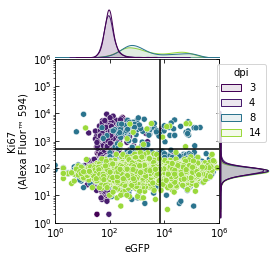

In [ ]:
# Extract values from each condition as np.array and put into list for plotting
x = 'GFP-H'
y = 'Alexa Fluor™ 594-H'
hue = 'dpi'
hue_order = [3, 4, 8, 14]
# hue_order = [14, 8, 4, 3]

colormap = sns.color_palette("mako", as_cmap=True)
colormap = sns.color_palette("crest", as_cmap=True)
colormap = sns.color_palette("dark:#5A9", as_cmap=True)
colormap = sns.diverging_palette(20, 150, center="dark", as_cmap=True)
colormap = no_yellow_viridis


# Downsample to 2,000 cells
NILDDRR_df = flow_df[flow_df['Cond'] == 'NILDDRR']
save = NILDDRR_df.groupby([hue]).sample(n=1*10**4, random_state=1)
# save = NILDDRR_df
# NILDDRR_df = save
# df = NILDDRR_df[(NILDDRR_df['dpi'] == 3)]
# df = NILDDRR_df[(NILDDRR_df['dpi'] == 3) | (NILDDRR_df['dpi'] == 4)]
# df = NILDDRR_df[(NILDDRR_df['dpi'] == 3) | (NILDDRR_df['dpi'] == 4)| (NILDDRR_df['dpi'] == 8)]
df = save[(save['dpi'] == 3) | (save['dpi'] == 4) | (save['dpi'] == 8) | (save['dpi'] == 14)]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# Set up figure
plt.figure(figsize=(3.5, 3.5))
# plt.rcParams['font.size'] = '12'
ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.set_axis_off()
ax_histy = plt.axes(rect_histy)
ax_histy.set_axis_off()

# Set limits and make everything log
xlim = (1, 1*10**6)
ylim = (1, 1*10**6)
ax_scatter.set_xlim(xlim)
ax_scatter.set_ylim(ylim)
ax_scatter.set_yscale('log')
ax_scatter.set_xscale('log')
ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

# Make density plots
sns.scatterplot(ax=ax_scatter, data=df, x=x, y=y, hue=hue, hue_order=hue_order, alpha=1,
            legend=False, palette=colormap)

# sns.kdeplot(
#     ax=ax_scatter,
#     data=df, x=x, y=y, hue=hue,
#     levels=100, thresh=0.0025,
#     hue_order=hue_order, alpha=0.7,
#     palette=colormap, log_scale=True, common_norm=False, fill=False, legend=False)

# Add in lines
ax_scatter.axvline(7*10**3, 0, 1, color='black')
ax_scatter.axhline(5*10**2, 0, 1, color='black')

# Plot histograms
sns.kdeplot(ax=ax_histx, data=df, x=x, hue=hue, hue_order=hue_order, alpha=0.1,
            log_scale=True, fill=True, common_norm=False, legend=False, palette=colormap)
sns.kdeplot(ax=ax_histy, data=df, y=y, hue=hue, hue_order=hue_order, alpha=0.1,
            log_scale=True, fill=True, common_norm=False, legend=True, palette=colormap)

# Format
ax_scatter.set_xlabel('eGFP')
ax_scatter.set_ylabel('Ki67\n(Alexa Fluor™ 594)')
plt.savefig(figpath + 'SI/Ki67_v_GFP_3-14dpi_NILDDRR_3-4dpi-scatter.svg')


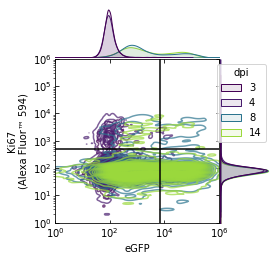

In [9]:
# Extract values from each condition as np.array and put into list for plotting
x = 'GFP-H'
y = 'Alexa Fluor™ 594-H'
hue = 'dpi'
hue_order = [3, 4, 8, 14]
# hue_order = [14, 8, 4, 3]

colormap = sns.color_palette("mako", as_cmap=True)
colormap = sns.color_palette("crest", as_cmap=True)
colormap = sns.color_palette("dark:#5A9", as_cmap=True)
colormap = sns.diverging_palette(20, 150, center="dark", as_cmap=True)
colormap = no_yellow_viridis


# Downsample to 2,000 cells
NILDDRR_df = flow_df[flow_df['Cond'] == 'NILDDRR']
save = NILDDRR_df.groupby([hue]).sample(n=3*10**4, random_state=1)
# save = NILDDRR_df
# NILDDRR_df = save
# df = NILDDRR_df[(NILDDRR_df['dpi'] == 3)]
# df = NILDDRR_df[(NILDDRR_df['dpi'] == 3) | (NILDDRR_df['dpi'] == 4)]
# df = NILDDRR_df[(NILDDRR_df['dpi'] == 3) | (NILDDRR_df['dpi'] == 4)| (NILDDRR_df['dpi'] == 8)]
df = save[(save['dpi'] == 3) | (save['dpi'] == 4) | (save['dpi'] == 8) | (save['dpi'] == 14)]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# Set up figure
plt.figure(figsize=(3.5, 3.5))
# plt.rcParams['font.size'] = '12'
ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.set_axis_off()
ax_histy = plt.axes(rect_histy)
ax_histy.set_axis_off()

# Set limits and make everything log
xlim = (1, 1*10**6)
ylim = (1, 1*10**6)
ax_scatter.set_xlim(xlim)
ax_scatter.set_ylim(ylim)
ax_scatter.set_yscale('log')
ax_scatter.set_xscale('log')
ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

# Make density plots
# sns.scatterplot(ax=ax_scatter, data=df, x=x, y=y, hue=hue, hue_order=hue_order, alpha=0.3,
#             legend=False, palette=colormap)

sns.kdeplot(
    ax=ax_scatter,
    data=df, x=x, y=y, hue=hue,
    levels=100, thresh=0.0025,
    hue_order=hue_order, alpha=0.7,
    palette=colormap, log_scale=True, common_norm=False, fill=False, legend=False)

# Add in lines
ax_scatter.axvline(7*10**3, 0, 1, color='black')
ax_scatter.axhline(5*10**2, 0, 1, color='black')

# Plot histograms
sns.kdeplot(ax=ax_histx, data=df, x=x, hue=hue, hue_order=hue_order, alpha=0.1,
            log_scale=True, fill=True, common_norm=False, legend=False, palette=colormap)
sns.kdeplot(ax=ax_histy, data=df, y=y, hue=hue, hue_order=hue_order, alpha=0.1,
            log_scale=True, fill=True, common_norm=False, legend=True, palette=colormap)

# Format
ax_scatter.set_xlabel('eGFP')
ax_scatter.set_ylabel('Ki67\n(Alexa Fluor™ 594)')
plt.savefig(figpath + 'SI/Ki67_v_GFP_3-14dpi_NILDDRR_3-4dpi-2.svg')
